### Bible Reading Progress Tracker - Data Exploration

Notebook ini digunakan untuk:
1. Load dan parse WhatsApp chat data
2. Analisis statistik dasar
3. Visualisasi pola komunikasi
4. Identifikasi pattern untuk progress reports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import sys

# suppress warnings in notebook
warnings.filterwarnings('ignore')

# always absolute path
sys.path.append(str(Path('../').resolve()))

from src.preprocessing.parsing.whatsapp_parser import WhatsAppParser
from src.preprocessing.parsing.context_labeling import ContextLabeler
from annotation.bible_reference_annotator import BibleReferenceAnnotator

# set style for plots
sns.set_style('darkgrid')   
plt.rcParams['figure.figsize'] = (14, 6)

#### 1. Load Data

In [2]:
# Load Whatsapp chat data
parser = WhatsAppParser()
labeler = ContextLabeler()

CHAT_FILE = Path('../data/raw/whatsapp_exports/_chat.txt')

df = parser.parse_chat_file(CHAT_FILE)
print(f'Total messages parsed: {len(df)}')
print(f'\nDataFrame shape: {df.shape}')
print(f'\nColumns: {df.columns.tolist()}')

Total messages parsed: 19142

DataFrame shape: (19142, 3)

Columns: ['timestamp', 'sender', 'message']


In [3]:
labeled_df = labeler.label_messages(df)
print(f'\nLabeled DataFrame shape: {labeled_df.shape}')


Labeled DataFrame shape: (19142, 5)


In [4]:
labeled_df

,timestamp,sender,message,primary_label,additional_labels
0,2020-08-02 11:41:31,Bible Reading Cycle 2,Pesan dan panggilan terenkripsi secara end-to-...,SYSTEM,[]
1,2020-08-02 11:41:31,Lenny Pandjidharma,Lenny Pandjidharma membuat grup “Bible Reading...,SYSTEM,[]
2,2020-08-02 11:41:31,Bible Reading Cycle 2,Lenny Pandjidharma menambahkan Anda,SYSTEM,[]
3,2020-08-02 11:41:43,Vik. Dessy Waiman,Lenny Pandjidharma menambahkan Vik. Dessy Waiman,SYSTEM,[]
4,2020-08-02 11:42:23,Lenny Pandjidharma,Lenny Pandjidharma mengubah deskripsi grup,SYSTEM,[]
...,...,...,...,...,...
19137,2022-07-01 15:18:49,Andrie HG,~ Andrie HG ditambahkan,SYSTEM,[]
19138,2022-07-01 15:15:16,Andrie HG,Terima kasih bu dessy 🙏🏽🙏🏽🙏🏽,USER,[SHORT]
19139,2022-07-01 15:15:50,Vik. Dessy Waiman,Sama-sama pak Andrie,USER,[SHORT]
19140,2022-07-01 15:17:46,Tom,Vik. Dessy Waiman mengeluarkan ~ Tom,SYSTEM,[]


In [6]:
labeled_df[labeled_df["additional_labels"].apply(lambda x: "MEDIA" in x)]

,timestamp,sender,message,primary_label,additional_labels
10,2020-08-02 11:53:31,BL katering,<terlampir: 00000011-STICKER-2020-08-02-11-53-...,USER,"[SHORT, MEDIA]"
32,2020-08-02 21:04:15,Yozef Tjandra,<terlampir: 00000033-PHOTO-2020-08-02-21-04-15...,USER,"[SHORT, MEDIA]"
68,2020-08-03 12:09:27,Oma Lisa,<terlampir: 00000069-AUDIO-2020-08-03-12-09-27...,USER,"[SHORT, MEDIA]"
133,2020-08-04 11:54:14,Dicky Andrian,<terlampir: 00000134-VIDEO-2020-08-04-11-54-14...,USER,"[SHORT, MEDIA]"
134,2020-08-04 11:54:17,Dicky Andrian,<terlampir: 00000135-VIDEO-2020-08-04-11-54-17...,USER,"[SHORT, MEDIA]"
...,...,...,...,...,...
19026,2022-06-21 22:43:04,Oma Lisa,<terlampir: 00019027-STICKER-2022-06-21-22-43-...,USER,"[SHORT, MEDIA]"
19060,2022-06-21 23:53:53,Vik. Dessy Waiman,<terlampir: 00019061-VIDEO-2022-06-21-23-53-53...,USER,"[SHORT, MEDIA]"
19073,2022-06-22 10:54:44,Darius Handoko,<terlampir: 00019074-STICKER-2022-06-22-10-54-...,USER,"[SHORT, MEDIA]"
19074,2022-06-22 10:54:45,Darius Handoko,<terlampir: 00019075-STICKER-2022-06-22-10-54-...,USER,"[SHORT, MEDIA]"


In [18]:
stats = labeler.get_label_statistics(labeled_df)
print("\nLabel Statistics:")
print(stats)


Label Statistics:
   label_type     label  count percentage
0     primary      USER  18679      97.58
1     primary    SYSTEM    463       2.42
2  additional     SHORT  17321      90.49
3  additional     MEDIA    110       0.57
4  additional      LONG   1358       7.09
5  additional  QUESTION    676       3.53
6  additional       URL     16       0.08


#### 2. Basic Statistics

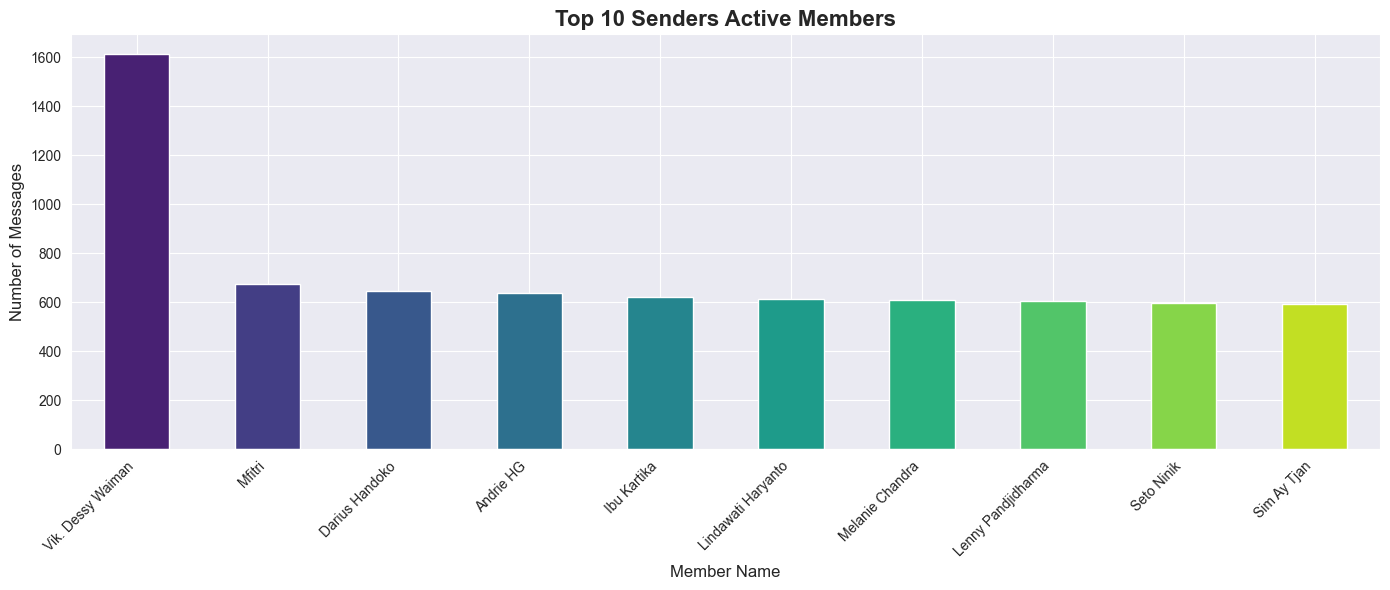

In [8]:
# Message counts by sender
sender_counts = labeled_df['sender'].value_counts()

# Top 10 active members
sender_counts.head(10).plot(kind='bar', color=sns.color_palette('viridis', 10))
plt.title('Top 10 Senders Active Members', fontsize=16, fontweight='bold')
plt.xlabel('Member Name', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
# Messages per day
messages_per_day = labeled_df.groupby(labeled_df['timestamp'].dt.date).size()

print(f'\nMessages per day statistics:')
print(f'Mean: {messages_per_day.mean():.2f}')
print(f'Median: {messages_per_day.median():.2f}')
print(f'Max: {messages_per_day.max()}')
print(f'Min: {messages_per_day.min()}')


Messages per day statistics:
Mean: 27.54
Median: 28.00
Max: 86
Min: 1


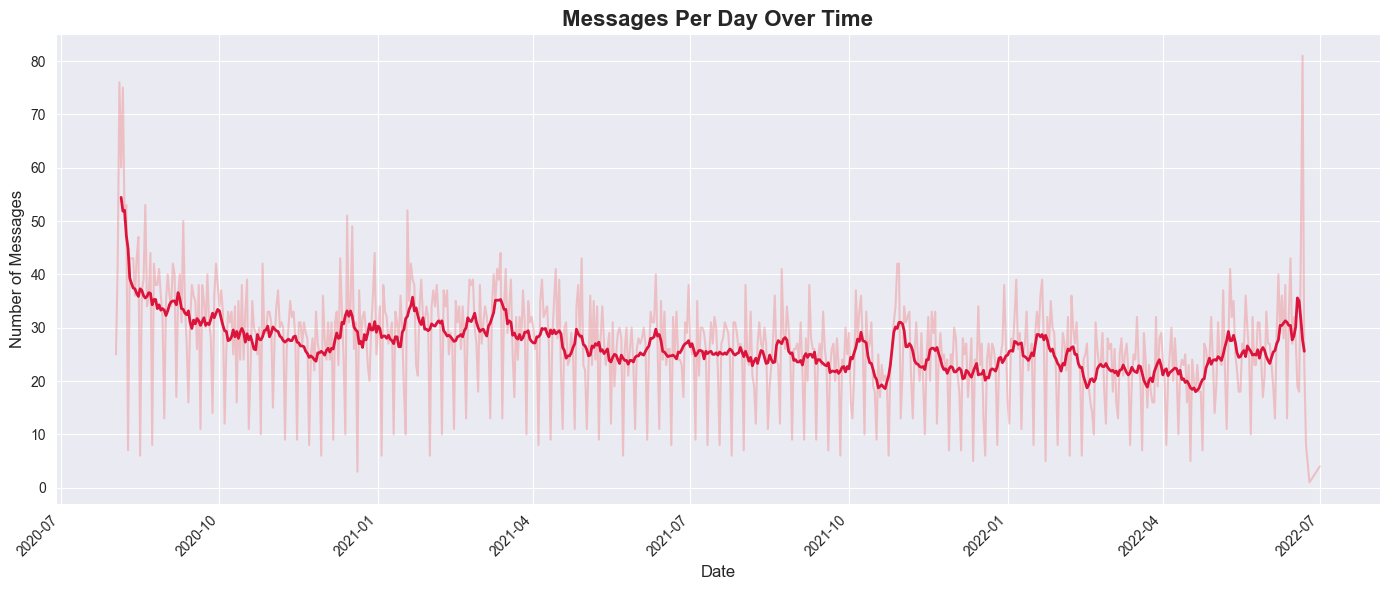

In [ ]:
rolling = messages_per_day.rolling(window=7, center=True).mean()
plt.plot(messages_per_day.index, messages_per_day.values, color='lightcoral', alpha=0.4, label='Daily')
plt.plot(rolling.index, rolling.values, color='crimson', linewidth=2, label='7-Day Rolling Average')
plt.title('Messages Per Day Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

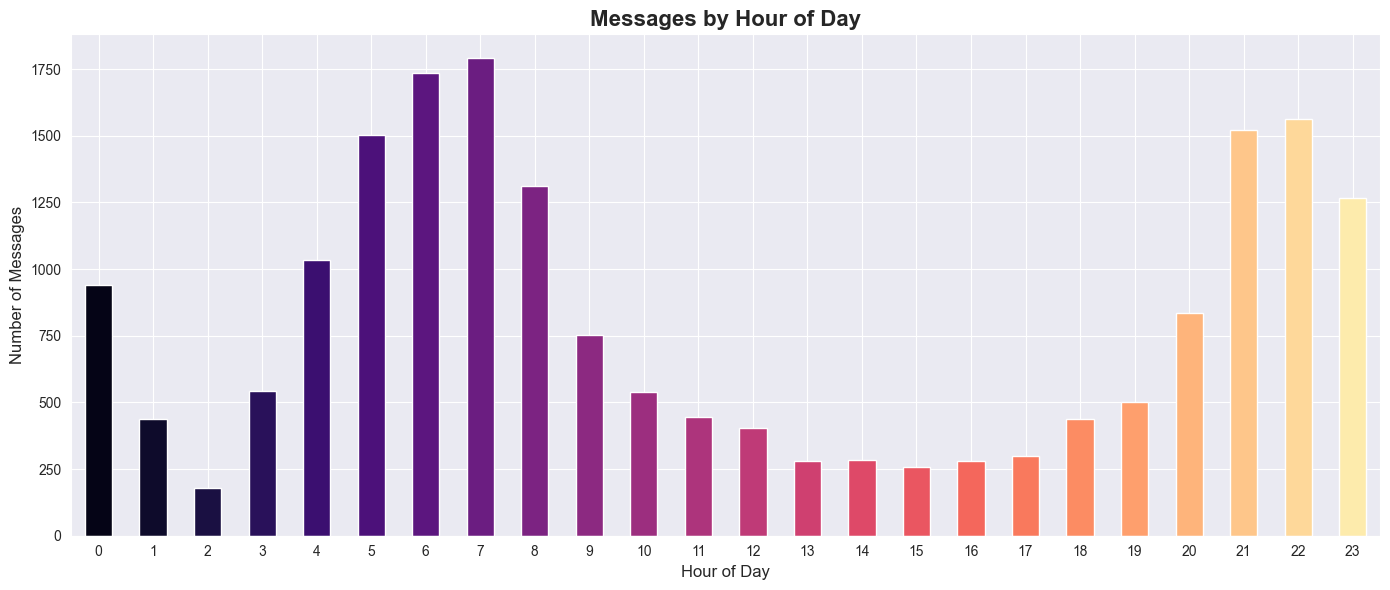

In [10]:
# Messages by hour of day
messages_per_hour = labeled_df.groupby(labeled_df['timestamp'].dt.hour).size()

messages_per_hour.plot(kind='bar', color=sns.color_palette('magma', 24))
plt.title('Messages by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [11]:
# Message Length Distribution (characters)
message_lengths = labeled_df['message'].str.len()

overall_mean = message_lengths.mean()
overall_median = message_lengths.median()

print(f'\nMessage Length Statistics')
print(f'  Mean: {overall_mean:.2f}')
print(f'  Median: {overall_median:.2f}')


Message Length Statistics
  Mean: 147.30
  Median: 15.00


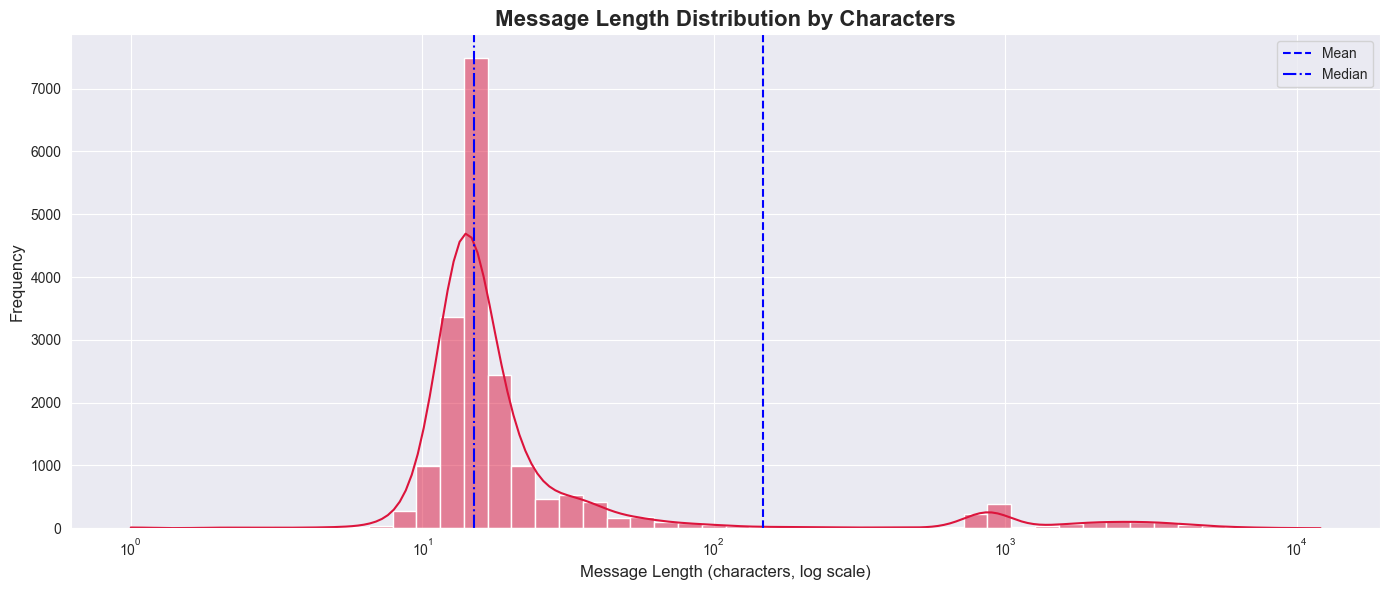

In [12]:
sns.histplot(message_lengths, bins=50, color='crimson', alpha=0.5, kde=True, log_scale=True)

plt.axvline(np.mean(message_lengths), color='blue', linestyle='--', label='Mean')
plt.axvline(np.median(message_lengths), color='blue', linestyle='-.', label='Median')

plt.title('Message Length Distribution by Characters', fontsize=16, fontweight='bold')
plt.xlabel('Message Length (characters, log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Number of lines per message
num_lines = labeled_df['message'].str.count('\n') + 1

overall_lines_mean = num_lines.mean()
overall_lines_median = num_lines.median()

print(f'\nNumber of Lines per Message:')
print(f'  Mean: {overall_lines_mean:.2f}')
print(f'  Median: {overall_lines_median:.2f}')


Number of Lines per Message:
  Mean: 3.88
  Median: 1.00


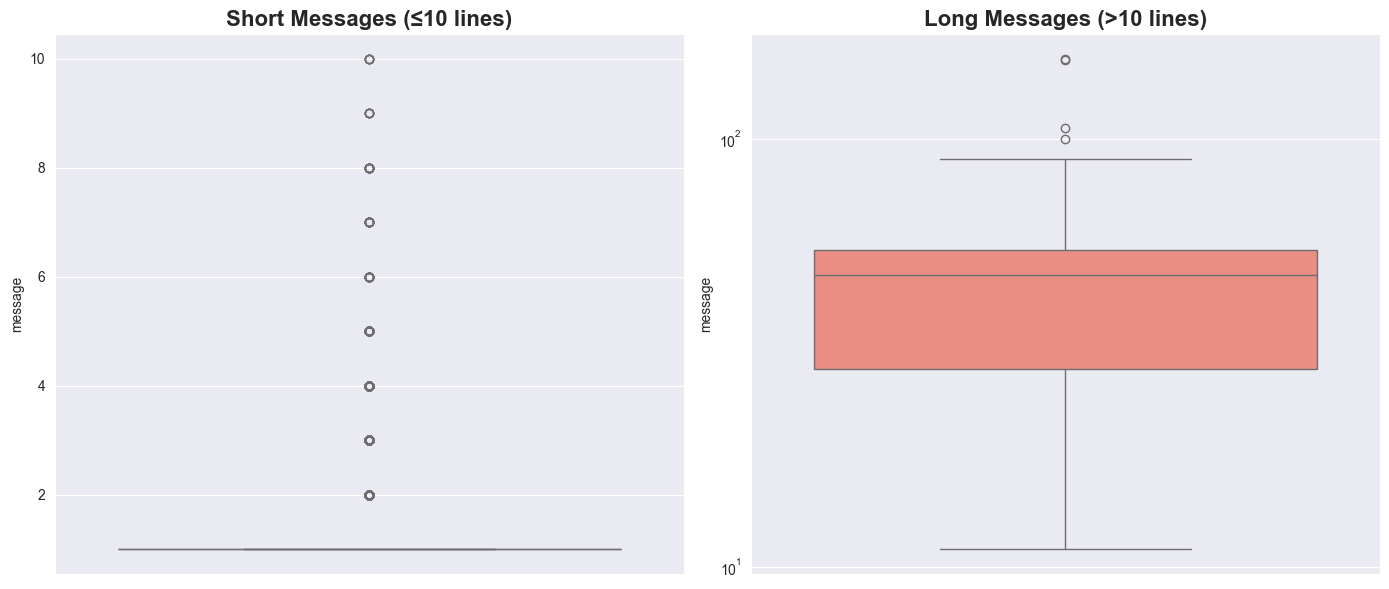

In [14]:
plt.subplot(1, 2, 1)
sns.boxplot(y=num_lines[num_lines <= 10], color='skyblue')
plt.title('Short Messages (≤10 lines)', fontsize=16, fontweight='bold')


plt.subplot(1, 2, 2)
sns.boxplot(y=num_lines[num_lines > 10], color='salmon')
plt.title('Long Messages (>10 lines)', fontsize=16, fontweight='bold')

plt.yscale('log')

plt.tight_layout()
plt.show()

#### 3. Identify Progress Reports

In [15]:
progress_keywords = ['done', 'selesai', 'sudah', 'finish', '✓', '✅', '☑', '💥']

labeled_df['has_progress_keyword'] = labeled_df['message'].str.lower().apply(
    lambda x: any(kw in x for kw in progress_keywords)
)

print(f'Message with progress keywords')
print(f'Total: {labeled_df["has_progress_keyword"].sum()} out of {len(labeled_df)} messages')
print(f'Percentage: {labeled_df["has_progress_keyword"].sum() / len(labeled_df) * 100:.2f}%')

Message with progress keywords
Total: 16420 out of 19142 messages
Percentage: 85.78%


In [16]:
print('\nSample Messages with Progress Keywords:')
labeled_df[labeled_df['has_progress_keyword']][['sender', 'message']].head(10)


Sample Messages with Progress Keywords:


,sender,message
7,"dr. Andreas C.N., Fp.B.",Siap terimakasih sudah diadd di grup 🙏🏻
25,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
28,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
30,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
37,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
38,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
40,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
43,Melanie Chandra,Kej 1-2 done
44,Lindawati Haryanto,Kej 1-2 done
45,Sherly Cahyadi,Kej 1-2 done


In [20]:
# Extract bible references
import json
with open("../data/bible_references.json", "r", encoding="utf-8") as f:
    bible_books = json.load(f) 

annotator = BibleReferenceAnnotator(bible_books)

mask = (
    (labeled_df["primary_label"] == "USER") &
    (labeled_df["additional_labels"].apply(lambda x: x == ["SHORT"]))
)

annotated_subset = annotator.annotate_dataframe(labeled_df.loc[mask])

cols = ["bible_references", "bible_ref_count", "ner_spans", "labels"]

labeled_df.loc[mask, cols] = annotated_subset[cols]

print("Messages with Bible References")

total_refs = (labeled_df["labels"] == True).sum()

print(f"Total: {total_refs}")
print(f"Percentage: {total_refs / len(labeled_df) * 100:.2f}%")


Messages with Bible References
Total: 16186
Percentage: 84.56%


In [21]:
progress_df = labeled_df[labeled_df["labels"] == True]

progress_df.to_csv('../data/processed/progress_report_messages.csv', index=False, encoding="utf-8-sig")

In [22]:
progress_df.shape

(16186, 10)

In [24]:
progress_df.head(15)

,timestamp,sender,message,primary_label,additional_labels,has_progress_keyword,bible_references,bible_ref_count,ner_spans,labels
33,2020-08-02 21:39:18,Vik. Dessy Waiman,1 Raja dan 2 Raja,user,[],False,"[{'book_start': 'dan', 'start_chapter': 2, 'bo...",1.0,"[{'start': 7, 'end': 10, 'label': 'BOOK', 'tex...",True
43,2020-08-03 03:48:55,Melanie Chandra,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
44,2020-08-03 04:03:51,Lindawati Haryanto,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
45,2020-08-03 04:08:44,Sherly Cahyadi,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
46,2020-08-03 04:32:19,Seto Ninik,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
47,2020-08-03 05:45:14,🪸Martha 🍁,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
48,2020-08-03 06:07:57,Dewi Pratiwi,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
49,2020-08-03 06:09:20,Endang Surati,Kej 1- 2 selesai.🙏,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
50,2020-08-03 06:14:01,Dicky Andrian,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True
51,2020-08-03 06:14:26,🎍,Kej 1-2 done,user,[],True,"[{'book_start': 'Kej', 'start_chapter': 1, 'bo...",1.0,"[{'start': 0, 'end': 3, 'label': 'BOOK', 'text...",True


In [25]:
other_df =labeled_df[labeled_df["labels"] != True]

other_df.to_csv('../data/processed/other_messages.csv', index=False, encoding="utf-8-sig")

In [26]:
other_df.shape

(2885, 10)

In [27]:
# Identify likely progress reports 
labeled_df['likely_progress'] = (
    labeled_df['has_progress_keyword'] & (labeled_df['labels'] == True)
)

print(f'Likely Progress Reports')
print(f'Total: {labeled_df["likely_progress"].sum()}')
print(f'Percentage: {labeled_df["likely_progress"].sum() / len(labeled_df) * 100:.2f}%')

Likely Progress Reports
Total: 15765
Percentage: 82.36%


In [28]:
# Sample likely progress reports
print('\nSample Likely Progress Reports:')
labeled_df[labeled_df['likely_progress']][['sender', 'message']].head(15)


Sample Likely Progress Reports:


,sender,message
43,Melanie Chandra,Kej 1-2 done
44,Lindawati Haryanto,Kej 1-2 done
45,Sherly Cahyadi,Kej 1-2 done
46,Seto Ninik,Kej 1-2 done
47,🪸Martha 🍁,Kej 1-2 done
48,Dewi Pratiwi,Kej 1-2 done
49,Endang Surati,Kej 1- 2 selesai.🙏
50,Dicky Andrian,Kej 1-2 done
51,🎍,Kej 1-2 done
52,"dr. Andreas C.N., Sp.B.",Kej 1-2 selesai


#### 4. Pattern Analysis

In [29]:
# Message length analysis 
labeled_df['message_length'] = labeled_df['message'].str.len()

# Compare length between progress and non-progress messages
progress_lengths = labeled_df[labeled_df['likely_progress']]['message_length']
non_progress_lengths = labeled_df[~labeled_df['likely_progress']]['message_length']

print(f'\nMessage Length Statistics')
print(f'\nProgress reports:')
print(f'  Mean: {progress_lengths.mean():.2f}')
print(f'  Median: {progress_lengths.median():.2f}')

print(f'\nNon-Progress reports:')
print(f'  Mean: {non_progress_lengths.mean():.2f}')
print(f'  Median: {non_progress_lengths.median():.2f}')


Message Length Statistics

Progress reports:
  Mean: 17.66
  Median: 14.00

Non-Progress reports:
  Mean: 752.48
  Median: 51.00


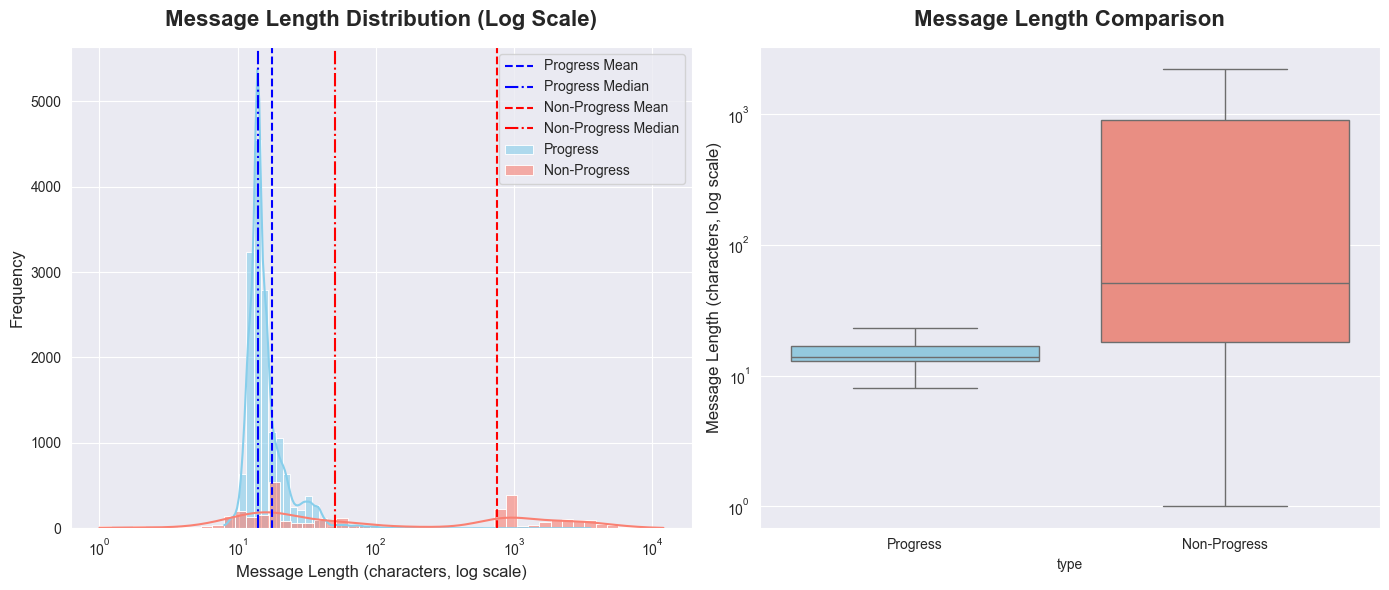

In [30]:

plt.subplot(1, 2, 1)
sns.histplot(progress_lengths, bins=50, color='skyblue', alpha=0.6, label='Progress', kde=True, log_scale=True)
sns.histplot(non_progress_lengths, bins=50, color='salmon',alpha=0.6, label='Non-Progress', kde=True, log_scale=True)

plt.axvline(np.mean(progress_lengths), color='blue', linestyle='--', label='Progress Mean')
plt.axvline(np.median(progress_lengths), color='blue', linestyle='-.', label='Progress Median')

plt.axvline(np.mean(non_progress_lengths), color='red', linestyle='--', label='Non-Progress Mean')
plt.axvline(np.median(non_progress_lengths), color='red', linestyle='-.', label='Non-Progress Median')

plt.title('Message Length Distribution (Log Scale)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Message Length (characters, log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

df_box = pd.DataFrame({
    'message_length': np.concatenate([progress_lengths, non_progress_lengths]),
    'type': ['Progress'] * len(progress_lengths) + ['Non-Progress'] * len(non_progress_lengths)
})

plt.subplot(1, 2, 2)
sns.boxplot(data=df_box, x='type', y='message_length', palette={'Progress': 'skyblue', 'Non-Progress': 'salmon'}, showfliers=False)
plt.yscale('log')
plt.xticks([0, 1], ['Progress', 'Non-Progress'])
plt.title('Message Length Comparison', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Message Length (characters, log scale)', fontsize=12)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

In [31]:
# Progress by Members
progress_by_member = labeled_df[labeled_df['likely_progress']].groupby('sender').size().sort_values(ascending=False)

print(f'Progress Reports by Members (Top 20)')
progress_by_member.head(20)

Progress Reports by Members (Top 20)


sender
Mfitri                      621
Lindawati Haryanto          600
Seto Ninik                  587
Darius Handoko              582
Andrie HG                   581
Ci Ina Paperku              575
susianawati309              564
Ivan teguh                  562
Sim Ay Tjan                 559
Melanie Chandra             553
🎍                           547
Nurcahaya Sihombing         546
Lenny Pandjidharma          535
Dewi Pratiwi                533
Ibu Kartika                 521
Ruri Handoko                495
Kristin WIjaya Nusantara    449
Endang Surati               444
Tjunfebelyana               412
Agnes                       403
dtype: int64

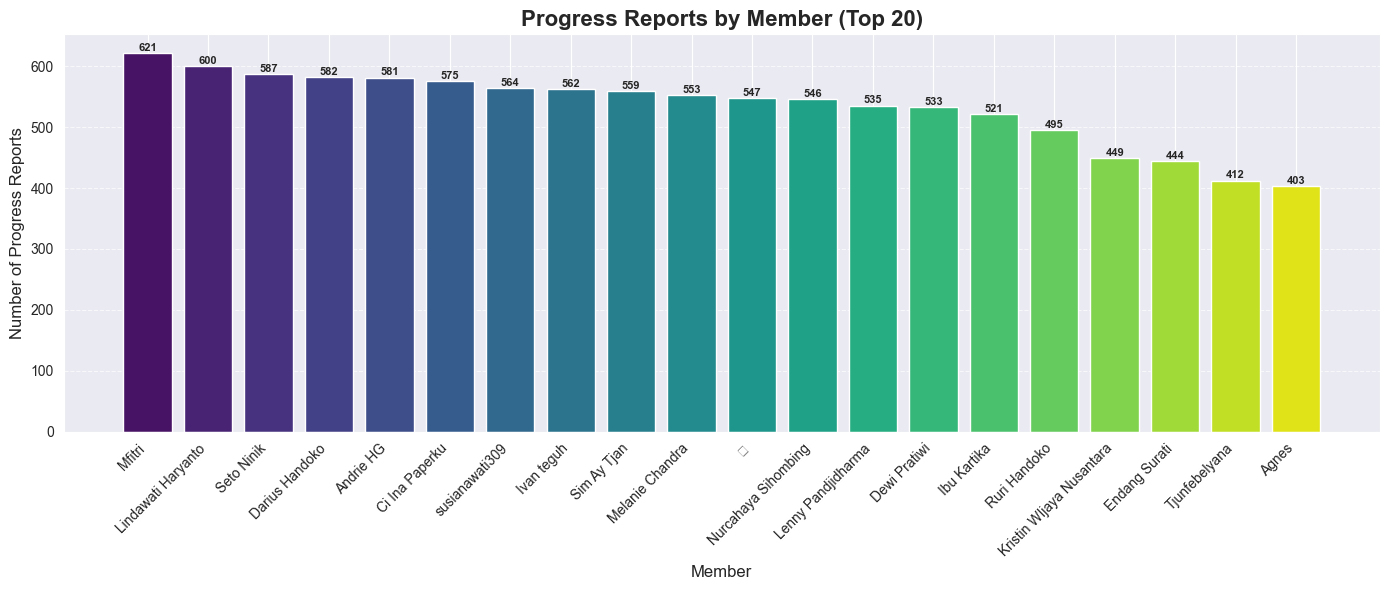

In [32]:
bars = plt.bar(progress_by_member.head(20).index,
               progress_by_member.head(20).values,
               color=sns.color_palette('viridis', 20))

plt.title('Progress Reports by Member (Top 20)', fontsize=16, fontweight='bold')
plt.xlabel('Member', fontsize=12)
plt.ylabel('Number of Progress Reports', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
progress_df = labeled_df[labeled_df["likely_progress"] == True]

progress_df.to_csv(
    "../data/processed/likely_progress_messages.csv",
    index=False,
    encoding="utf-8-sig"
)
